# FOOD DELIVERY TIME PREDICTION
### by Subham Varma

### Abstract:
Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.

### Problem Statement:
- The goal of this project is to predict the food delivery time in real-time using various Machine Learning techniques
- For the benefit of the customers as well as the service providers, a well analyzed time prediction model will be served
- The hectic for providing so many features to get the real-time will be reduced by estimating the most mattering features

### Steps that we will follow to achieve our objective:
- Gathering Data: The dataset for our model is available in kaggle. The ref link is listed along with the step.
- Exploratory data analysis (EDA): We will follow various steps to get the insight of our data- How data looks like? What are the columns and there dtypes? Size of the dataset? Is the data available in correct format and so on 
- Data wrangling: This step will be followed side by side with EDA. We will handle missing and duplicated values by imputing or droping the relevant values to it. Also we will remove the unwanted columns which have no relation with our target output
- Data visualization: We will visualize our selected columns by using EDA like Univariant and Bivariant analysis. we will determine the depth of correlation between columns and also find the skewness of data and outliers 
- Preprocessing: Here, we will make data ready for our Machine Learning model by Encoding the categorical columns and by scaling the data
- Splitting the data: Next, will split the data into training and testing sets. The training set is used to train the model and the testing set is used to evaluate the performance of the final model.
- Selecting and training a model: Then we need to choose a regression algorithm and train it on the training data. We wiill also tune the hyperparameters of the selected model using cross-validation on the validation set.
- Evaluating the model: After training the model, we will evaluate its performance on the testing set. we will use metrics such as mean squared error (MSE) and R-squared to evaluate the model's accuracy.

## Step-1> Import Dataset and necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Food delivery Time dataset ref link:- "https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?resource=download&select=train.csv"

In [4]:
df = pd.read_csv(r"C:\Users\SHUBH\Desktop\DA EduBridge\Capstone Project\Food Delivery Time\train.csv")

## Step-2> Exploratory Data Analysis

In [5]:
df.sample(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
11833,0x3819,MYSRES07DEL01,35,4.1,12.325461,76.632278,12.395461,76.702278,27-03-2022,21:40:00,21:45:00,conditions Cloudy,Jam,2,Buffet,scooter,1,Yes,Metropolitian,(min) 48
26022,0x9877,BANGRES14DEL02,23,3.2,12.949934,77.699386,13.079934,77.829386,27-03-2022,23:10:00,23:25:00,conditions Sunny,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 31
43018,0xb03f,VADRES010DEL01,33,5,22.310329,73.169083,22.350329,73.209083,24-03-2022,13:45:00,14:00:00,conditions Sandstorms,High,1,Snack,scooter,1,No,Metropolitian,(min) 33


In [6]:
df.shape

(45593, 20)

In [7]:
# getting some ideas about the rows and columns and Dtype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [8]:
# as we checked info of dataframe, it's showing there is none null values
# but in the preview we can see there are many 'NaN ' values filled in the columns
# we have to replace these 'NaN ' values with some numerical values
df = df.replace('NaN', float(np.nan), regex=True)
df.isna().sum()
# now we can see the NaN values are getting detected

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

## Step-3> Data wrangling / Data cleaning

In [9]:
# deleting all columns which has nothing to do with our Target variable
df = df.drop(columns=['ID','Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked','Vehicle_condition',
                'Type_of_vehicle','Festival','City'], axis=1)

- Imputing missing values with median and mode method
- Convert the columns with appropriate datatypes
- Correcting the format of target variable

In [10]:
# 1st Age column: fill NA values with median value and change datatype to int
df['Delivery_person_Age']= df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median())
df['Delivery_person_Age']= df['Delivery_person_Age'].astype('int')

# 2nd Rating column: fill NA values with median value and change datatype to float
df['Delivery_person_Ratings']= df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())
df['Delivery_person_Ratings']= df['Delivery_person_Ratings'].astype('float')

# 6th weather condition: format the values and fill NA values with most occuring category
df['Weatherconditions'] = df['Weatherconditions'].str.split(" ", expand=True)[1]
df['Weatherconditions']= df['Weatherconditions'].fillna(df['Weatherconditions'].value_counts().index[0])

# 7th Road_traffic_density: fill NA values with most occuring category
df['Road_traffic_density']= df['Road_traffic_density'].fillna(df['Road_traffic_density'].value_counts().index[0])

# 9th multiple_deliveries: fill NA values with most occuring value
df['multiple_deliveries']= df['multiple_deliveries'].fillna(df['multiple_deliveries'].value_counts().index[0])

# 10th Time_taken(min): format the values and change datatype to int
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
df['Time_taken(min)']= df['Time_taken(min)'].astype('int')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.584739,5.696333,15.000000,25.000000,30.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.636552,0.327906,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


Distance is the very important feature which is required for our Target
- Create a new column named "Distance(km)" with the heip of available lat/lon columns
- For calculating values for this column, will create a function which will take lat/lon of two points and outputs the distance between them
- After creating new column we will add this column to our dataframe and drop the input columns

In [12]:
# instead of using lat/lon of origin & destination, we can create a new 'Distance' column 
# for that we need to find the distance between two location by using 'Haversine Formula'
# let's create a function to calculate distance
from math import radians,sqrt,cos,sin,asin
def Distance(laA,loA,laB,loB):
    R = 6371 # earth's radius in KM
    D_la = radians(laB - laA)
    D_lo = radians(loB - loA)
    # using Haversine Formula
    a = sin(D_la/2)**2 + cos(laA)*cos(laB)*sin(D_lo/2)**2
    c = 2 * asin(sqrt(a))
    return round(R*c, 2)

In [13]:
# removing negative notation from latitude and longitude doesn't affect the distance between two points
# also negative values of latitude and longitude create issues with the mathematical calculation
cols=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for col in cols:
    df[col]= abs(df[col])

In [14]:
# calculate Distance for each data point and add it to the data
df['Distance(km)'] = np.nan
for i in range(len(df)):
    df.loc[i,'Distance(km)'] = Distance(df.loc[i,'Restaurant_latitude'],
                                        df.loc[i,'Restaurant_longitude'],
                                        df.loc[i,'Delivery_location_latitude'],
                                        df.loc[i,'Delivery_location_longitude'])
    
# after creating Distance variable there is no need for lat/lon variables
# we will create new dataframe with remaining varibles except for lat/lon
df1 = df.drop(columns=['Restaurant_latitude','Restaurant_longitude',
                       'Delivery_location_latitude','Delivery_location_longitude'],axis=1)

In [15]:
df1.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Type_of_order              0
multiple_deliveries        0
Time_taken(min)            0
Distance(km)               0
dtype: int64

In [16]:
df1.duplicated().sum()

18

In [17]:
df1 = df1.drop_duplicates()
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45575.0,29.585299,5.695931,15.00,25.00,30.00,34.00,50.00
Delivery_person_Ratings,45575.0,4.636538,0.327959,1.00,4.60,4.70,4.80,6.00
Time_taken(min),45575.0,26.296237,9.384463,10.00,19.00,26.00,32.00,54.00
Distance(km),45575.0,8.733244,5.161992,1.11,4.52,7.99,12.35,21.21


## Step-4> Data Visualization

let's do some univariant and multivariant analysis of our feature and target variables
- Univariant Analysis 
    - for numerical variable let's plot the Boxplot to get the distribution of data
    - for categorical variables let's plot a Countplot to get the distribution of data

In [18]:
# done with data cleaning
# so let's do some univariant and multivariant analysis of our feature and target variables 
df1.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Type_of_order', 'multiple_deliveries',
       'Time_taken(min)', 'Distance(km)'],
      dtype='object')

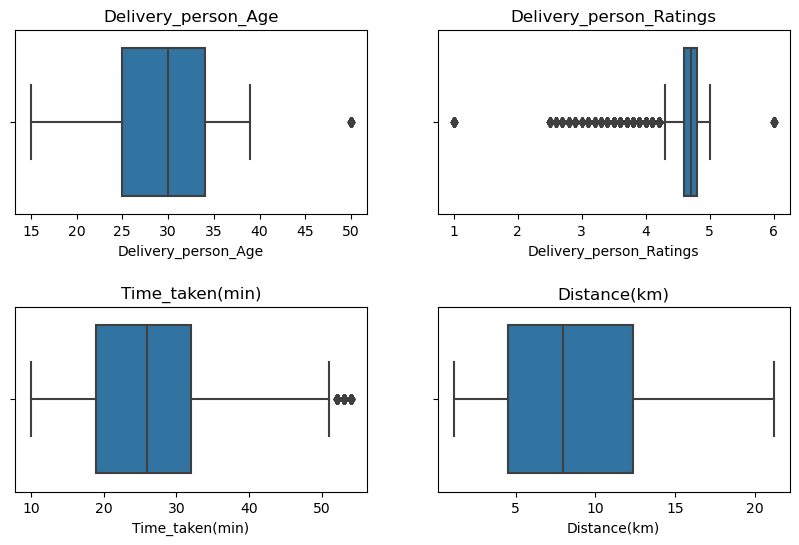

In [19]:
# for numerical variable let's plot the Boxplot to get  the distribution of data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
sns.boxplot(df1['Delivery_person_Age'], data=df1, ax=axes[0, 0])
sns.boxplot(df1['Delivery_person_Ratings'], data=df1, ax=axes[0, 1])
sns.boxplot(df1['Time_taken(min)'], data=df1, ax=axes[1, 0])
sns.boxplot(df1['Distance(km)'], data=df1, ax=axes[1, 1])

axes[0, 0].set_title('Delivery_person_Age')
axes[0, 1].set_title('Delivery_person_Ratings')
axes[1, 0].set_title('Time_taken(min)')
axes[1, 1].set_title('Distance(km)')

plt.subplots_adjust(hspace=0.5)
plt.show()

Removing the outliers from Age and rating variable that are far away from our normal data

In [20]:
outliers1 = df1[df1['Delivery_person_Age'] > 40]
index_to_drop1 = outliers1.index
df1.drop(index_to_drop1, inplace=True)

outliers2 = df1[df1['Delivery_person_Ratings'] < 4.2]
index_to_drop2 = outliers2.index
df1.drop(index_to_drop2, inplace=True)

outliers3 = df1[df1['Time_taken(min)'] > 48]
index_to_drop3 = outliers3.index
df1.drop(index_to_drop3, inplace=True)

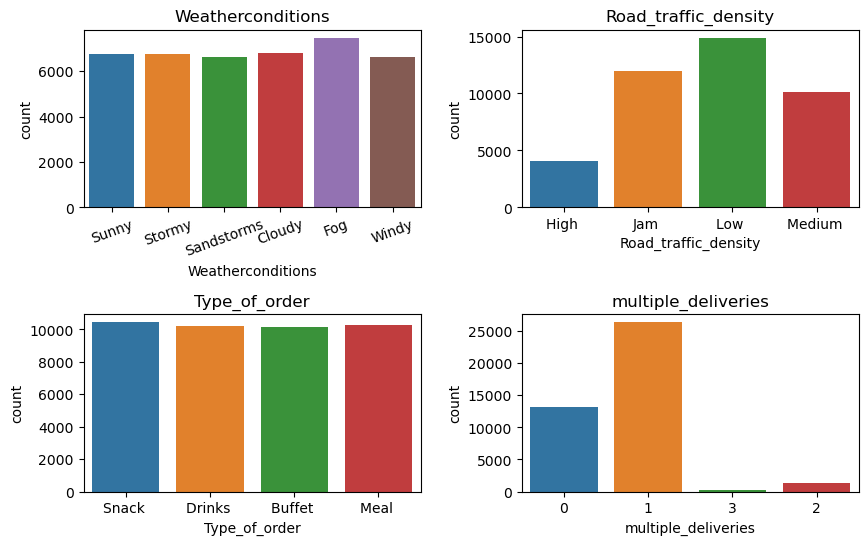

In [21]:
# for categorical variables let's plot a Barplot to get the distribution of data 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
sns.countplot(x=df1['Weatherconditions'], data=df1, ax=axes[0, 0]) 
sns.countplot(x=df1['Road_traffic_density'], data=df1, ax=axes[0, 1])
sns.countplot(x=df1['Type_of_order'], data=df1, ax=axes[1, 0])
sns.countplot(x=df1['multiple_deliveries'], data=df1, ax=axes[1, 1])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=20)
axes[0, 0].set_title('Weatherconditions')
axes[0, 1].set_title('Road_traffic_density')
axes[1, 0].set_title('Type_of_order')
axes[1, 1].set_title('multiple_deliveries')

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- From above it is clear that our two categorical columns, traffic density and multiple deliveries are totally imbalance
- Hence we will keep it in mind while splitting the data to go with stratified sampling so as to avoid effect of imbalance data 

- Bivariant Analysis : as target variable is Numerical 
    - for numerical vs categorical variable let's plot the Boxplot to see how features are influencing target
    - for numerical vs numerical variable let's plot a Scatterplot to see how features are influencing target

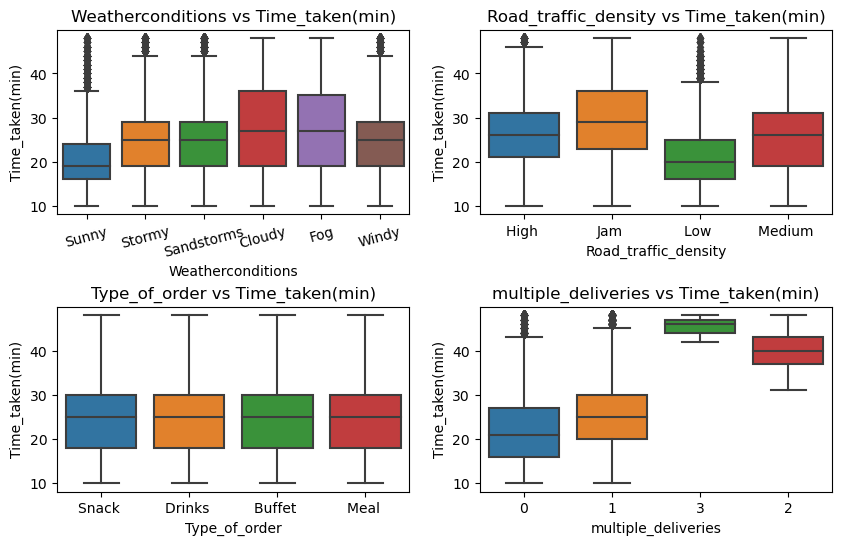

In [22]:
# let's visualize how categorical variables are influencing our target variable by using Boxplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
sns.boxplot(x=df1['Weatherconditions'], y=df1['Time_taken(min)'], data=df1, ax=axes[0, 0])
sns.boxplot(x=df1['Road_traffic_density'], y=df1['Time_taken(min)'], data=df1, ax=axes[0, 1])
sns.boxplot(x=df1['Type_of_order'], y=df1['Time_taken(min)'], data=df1, ax=axes[1, 0])
sns.boxplot(x=df1['multiple_deliveries'], y=df1['Time_taken(min)'], data=df1, ax=axes[1, 1])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=15)
axes[0, 0].set_title('Weatherconditions vs Time_taken(min)')
axes[0, 1].set_title('Road_traffic_density vs Time_taken(min)')
axes[1, 0].set_title('Type_of_order vs Time_taken(min)')
axes[1, 1].set_title('multiple_deliveries vs Time_taken(min)')

plt.subplots_adjust(hspace=0.5)
plt.show()

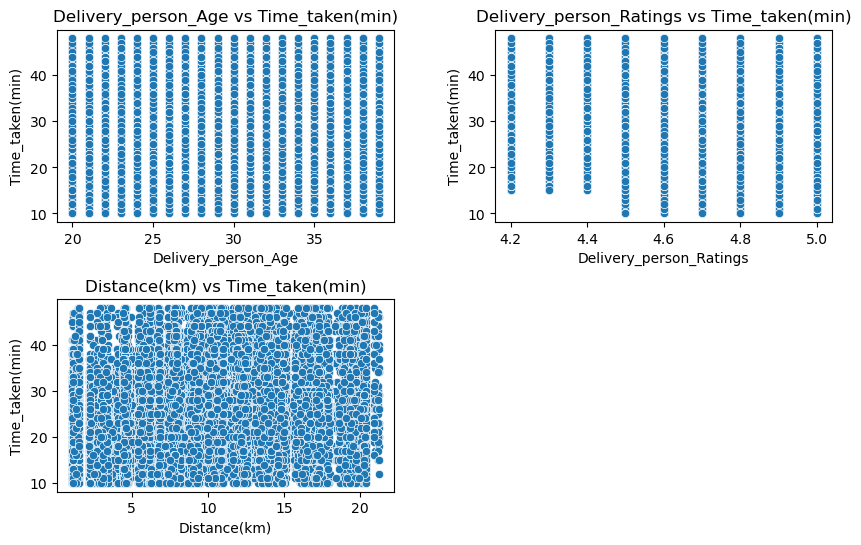

In [23]:
# let's visualize how numerical variables are influencing our target variable using scatterplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
fig.delaxes(axes[1,1])
sns.scatterplot(x=df1['Delivery_person_Age'], y=df1['Time_taken(min)'], data=df1, ax=axes[0,0], legend=False)
sns.scatterplot(x=df1['Delivery_person_Ratings'], y=df1['Time_taken(min)'], data=df1, ax=axes[0,1])
sns.scatterplot(x=df1['Distance(km)'], y=df1['Time_taken(min)'], data=df1, ax=axes[1,0])

axes[0, 0].set_title('Delivery_person_Age vs Time_taken(min)')
axes[0, 1].set_title('Delivery_person_Ratings vs Time_taken(min)')
axes[1, 0].set_title('Distance(km) vs Time_taken(min)')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

- From above scatterplot it is hard tho find any relationship because of very dense data
- So we will check the correlation between all the numerical columns by using correlation function

In [24]:
# let's check the correlation of each numerical columns with our target variable
df1.corr()['Time_taken(min)']

Delivery_person_Age        0.281399
Delivery_person_Ratings   -0.222118
Time_taken(min)            1.000000
Distance(km)               0.287333
Name: Time_taken(min), dtype: float64

From above it's clear that time taken for delivery is positively correlated to Age of a person and the distance, while it is negatively correlated to the person's rating

## Step-5> Data pre-processing

In [25]:
# before using the data for ML algorithms, firstly we have to convert categorical variable to numerical
# just for safer side before doing further opereations let's create copy of data and proceed with it
df2 = df1.copy()

In [26]:
# using mapping method to encoding categorical variables
mapping1 = {'Sunny':0, 'Stormy':1, 'Sandstorms':2, 'Cloudy':3, 'Fog':4, 'Windy':5}
df2['Weatherconditions'] = df2['Weatherconditions'].map(mapping1)

mapping2 = {'High ':3, 'Jam ':1, 'Low ':0, 'Medium ':2}
df2['Road_traffic_density'] = df2['Road_traffic_density'].map(mapping2)

mapping3 = {'Snack ':0, 'Drinks ':1, 'Buffet ':2, 'Meal ':3}
df2['Type_of_order'] = df2['Type_of_order'].map(mapping3)

mapping4 = {'0':0, '1':1, '3':3, '2':2}
df2['multiple_deliveries'] = df2['multiple_deliveries'].map(mapping4)

In [27]:
# have a look at the final dataset once
df2.sample(5)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_order,multiple_deliveries,Time_taken(min),Distance(km)
18923,25,5.0,3,0,3,1,23,18.82
9777,24,4.9,1,2,3,1,26,10.66
28029,20,4.7,3,2,1,1,26,16.66
7860,35,4.7,5,0,1,0,23,1.14
44401,30,4.4,4,0,3,2,39,10.91


## Step-6> Splitting the data
- we will go for data splitting byusing train test split function.
- keep in mind we have to use 'Stratify' sampling while splitting

In [28]:
# import necessary tools, algorithms, and metrics from sklearn to create the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# let's first define features and target
X = df2.drop(columns=['Time_taken(min)'])
y = df2['Time_taken(min)']

# divide the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

## Step-7> Selecting and Training the Model

In [30]:
# 4 most suitable Algorithms for predicting time will be:
    # 1) LinearRegression
    # 2) DecisionTrees
    # 3) RandomForest
    # 4) GradientBoosting
    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [31]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=112)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=117)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Support Vector Regression
sv_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
sv_model.fit(X_train, y_train)
sv_pred = sv_model.predict(X_test)

# Evaluate the models
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

sv_mse = mean_squared_error(y_test, sv_pred)
sv_r2 = r2_score(y_test, sv_pred)

print("Linear Regression metrics:")
print("Mean squared error:", lr_mse)
print("R-squared score:", lr_r2)
print()

print("Decision Tree Regression metrics:")
print("Mean squared error:", dt_mse)
print("R-squared score:", dt_r2)
print()

print("Random Forest Regression metrics:")
print("Mean squared error:", rf_mse)
print("R-squared score:", rf_r2)
print()

print("Gradient Boosting Regression metrics:")
print("Mean squared error:", gb_mse)
print("R-squared score:", gb_r2)
print()

print("Support Vector Regression metrics:")
print("Mean squared error:", sv_mse)
print("R-squared score:", sv_r2)

Linear Regression metrics:
Mean squared error: 48.71466604374159
R-squared score: 0.3534107769857673

Decision Tree Regression metrics:
Mean squared error: 47.150115684364344
R-squared score: 0.37417703658257995

Random Forest Regression metrics:
Mean squared error: 26.180415021915167
R-squared score: 0.6525076412920412

Gradient Boosting Regression metrics:
Mean squared error: 25.866217555640205
R-squared score: 0.6566779807830141

Support Vector Regression metrics:
Mean squared error: 49.110338151666575
R-squared score: 0.3481590254782869


In [32]:
# create a dictionary to store the evaluated metrics for each model
metrics = {
    'Random Forest Regression': [rf_mse, rf_r2],
    'Gradient Boosting Regression': [gb_mse, gb_r2],
    'Linear Regression': [lr_mse, lr_r2],
    'Decision Tree Regression': [dt_mse, dt_r2],
    'Support Vector Regression metrics': [sv_mse, sv_r2]
}

# create a pandas DataFrame from the metrics dictionary
df3 = pd.DataFrame.from_dict(metrics, orient='index', columns=['MSE', 'R-squared'])
df3.sort_values(by=['R-squared'],ascending=False)

,MSE,R-squared
Gradient Boosting Regression,25.866218,0.656678
Random Forest Regression,26.180415,0.652508
Decision Tree Regression,47.150116,0.374177
Linear Regression,48.714666,0.353411
Support Vector Regression metrics,49.110338,0.348159


- From above sorting it is clear for us to select the 'GradientBoostingRegressor' for our model
- Now after selection to get the best of our model, we will do a cross validation to get the best hyper parameters for our model 

In [49]:
# from above evaluation it's very clear that top model for our dataset is Gradient Boosting Regression
# let's try to tune parameters of gb_model and see the variations
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()
# Define hyperparameters range to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Use GridSearchCV to find the best hyperparameters
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg_cv = GridSearchCV(gb_reg, param_grid, cv=5)
gb_reg_cv.fit(X_train, y_train)
y_pred = gb_reg_cv.predict(X_test)

# Print the best hyperparameters and corresponding score
print('Best hyperparameters:', gb_reg_cv.best_params_)
print('Best score:', gb_reg_cv.best_score_)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print("R-squared score:", r2)

end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time:', elapsed_time, 'seconds')

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best score: 0.6889758361810887
Mean squared error: 22.988660099778055
R-squared score: 0.6948717690334366
Elapsed time: 1499.4931330680847 seconds


#### Now we will just insert this hyper-parameters in our model and create a final model

In [37]:
# Final model with best parameters setting
gb_fmodel = GradientBoostingRegressor(max_depth=6, learning_rate=0.1,
                                      n_estimators=100, random_state=96)
gb_fmodel.fit(X_train, y_train)
gb_fpred = gb_fmodel.predict(X_test)

gb_fmse = mean_squared_error(y_test, gb_fpred)
gb_fr2 = r2_score(y_test, gb_fpred)

print("Gradient Boosting Regression metrics:")
print("Mean squared error:", gb_fmse)
print("R-squared score:", gb_fr2)

Gradient Boosting Regression metrics:
Mean squared error: 22.996800233341972
R-squared score: 0.6947637251307729


##### Input the values in proper order as below and refer the codes for categories-
- 'Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'multiple_deliveries', 'Distance'
    - 'Weatherconditions' = {'Sunny':0, 'Stormy':1, 'Sandstorms':2, 'Cloudy':3, 'Fog':4, 'Windy':5}
    - 'Road_traffic_density' = {'High ':3, 'Jam ':1, 'Low ':0, 'Medium ':2}
    - 'Type_of_order' = {'Snack ':0, 'Drinks ':1, 'Buffet ':2, 'Meal ':3}
    - 'multiple_deliveries' = {'0':0, '1':1, '3':3, '2':2}

In [103]:
# Creating a function for Prediction
def predict_time(Delivery_person_Age, Delivery_person_Ratings, Weatherconditions,
       Road_traffic_density, Type_of_order, multiple_deliveries,
       Distance):
                   input_array = np.array([[Delivery_person_Age, Delivery_person_Ratings, Weatherconditions,
                             Road_traffic_density, Type_of_order, multiple_deliveries, Distance]])
                   prediction = gb_fmodel.predict(input_array)
                   print('Item will be delivered in', round(prediction[0],2), 'mins')


### Testing our model by giving required inputs

In [104]:
predict_time(32, 4, 1, 0, 1, 1, 3)

Item will be delivered in 26.67 mins


In [105]:
predict_time(25, 5.6, 4, 3, 3, 0, 5.6)

Item will be delivered in 24.22 mins


In [106]:
predict_time(48, 3.8, 0, 0, 0, 3, 1.2)

Item will be delivered in 41.81 mins


In [107]:
# saving model to deploy
import joblib
joblib.dump(gb_fmodel, 'model.pkl')

['model.pkl']

## Conclusion:
Now the model is ready to deploy with the accuracy of more than 70% which is the best accuracy that can be attained with this selected dataset.